<a href="https://colab.research.google.com/github/3B032049/2025_ML_hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

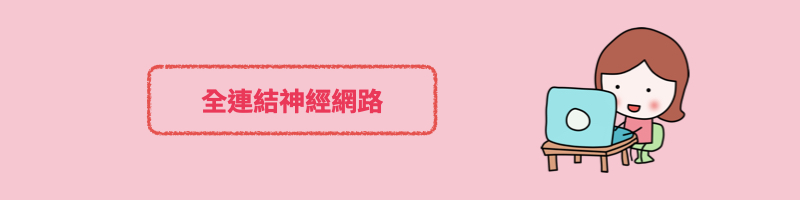

# 11.2讀入基本套件

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [83]:
from tensorflow.keras.datasets import fashion_mnist #流行衣物

# 11.4切分訓練資料和測試資料

In [84]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 11.5欣賞一下資料

In [85]:
x_train.shape

(60000, 28, 28)

In [86]:
x_test.shape

(10000, 28, 28)

In [87]:
n = 9487 #隨機看一筆資料的長相
x_train[n] #讀出第 n 筆資料

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  79, 116,  76,
         28,  61, 116, 123,  52,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 174, 166, 178,
        107, 150, 150, 167, 157,  20,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 130, 148, 151,
         84, 131, 159, 134, 123,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97, 120, 111, 139,
        163, 155, 111, 110, 139,  28,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 126, 112,  99,
         97, 103, 108, 107, 139,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 119, 104, 102,
        111, 110, 103,  96, 136,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 116,  93,  96,
         96,  97,  92,  93, 138,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 115,  95,  91,
         96, 100,  96,  96, 143,  49,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 122, 111,  93,  95,
         97, 100,  97,  93, 135,  60,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 128, 108,  95,  96,
         95,  95,  93,  92, 128,  95,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  71, 130, 103,  97,  93,
         93,  91,  92,  92, 111, 138,  20,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 120, 122, 107,  97,  92,
         97,  92,  96,  96, 111, 144,  59,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 112, 119, 106,  99,  93,
         95,  92,  92,  96, 103, 146,  48,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 107, 119, 110,  97,  93,
         92,  99,  92,  95, 103, 150,  56,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  97, 116, 116,  95,  92,
         96,  99,  92,  99, 102, 144,  52,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  95, 116, 118, 100,  93,
         96,  92,  96, 100, 102, 136,  51,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 107, 119, 112, 103,  92,
         95,  93,  97,  99,  97, 126,  59,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 124, 116, 115, 112, 102,
         99,  96,  99, 100,  95, 126,  63,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 112, 114, 114, 103,
        102, 102, 102,  99,  99, 132,  55,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 110, 116, 114, 102,
         99, 103, 103, 100, 102, 124,  52,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 130, 110, 115, 112, 104,
        100,  97, 103, 107,  91, 159,  68,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 130, 110, 107, 118, 108,
        102,  97, 107, 115,  92, 175,  67,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 128, 118, 104, 123, 107,
        106, 104, 110, 111, 100, 134,  53,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 130, 119, 106, 124, 110,
        110, 108, 110, 110, 106, 135,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

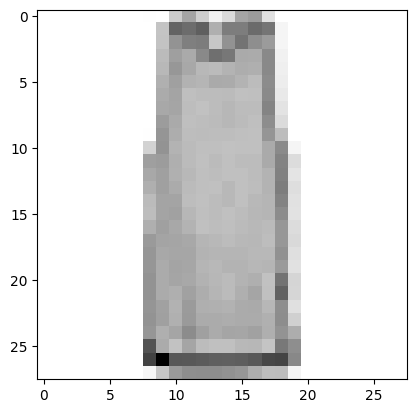

In [88]:
plt.imshow(x_train[n], cmap='Greys')

In [89]:
y_train[n] #第 n 筆資料的答案

np.uint8(0)

# 11.6打造函數學習機前的資料處理

因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [90]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [91]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [92]:
y_train.shape

(60000, 10)

In [93]:
y_train[n]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 12.1第一部曲：打造神經網路

In [94]:
model = Sequential()

In [95]:
model.add(Dense(100, input_dim=784, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model.add(Dense(100, activation='relu'))

In [97]:
model.add(Dense(100, activation='relu'))

In [98]:
model.add(Dense(10, activation='softmax'))

# 12.2組裝自己的神經網路

In [99]:
# 組裝神經網路
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087),
              metrics=['accuracy'])

# 12.3欣賞自己的神經網路

In [100]:
# 看一下神經網路
model.summary()#(輸入*神經元)+b  784*100 +100

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,710 (389.49 KB)

 Trainable params: 99,710 (389.49 KB)

 Non-trainable params: 0 (0.00 B)

# 12.4第二部曲：訓練

In [101]:
#訓練
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2518 - loss: 0.0877
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6269 - loss: 0.0580
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7199 - loss: 0.0395
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7885 - loss: 0.0331
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8058 - loss: 0.0294
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8140 - loss: 0.0275
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8240 - loss: 0.0261
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8322 - loss: 0.0248
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8385 - loss: 0.0238
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8395 - loss: 0.0237
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8403 - loss: 0.0234
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

# 12.5第三部曲：預測

In [102]:
x_test[5].shape

(784,)

In [103]:
inp = x_test[5].reshape(1,784)

In [104]:
model.predict(inp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[4.00878396e-03, 9.92854297e-01, 5.92853234e-04, 4.69548977e-04,
        1.91347732e-03, 4.17005417e-08, 4.72965730e-05, 9.41017352e-05,
        1.95490793e-05, 1.10328486e-07]], dtype=float32)

In [105]:
np.argmax([9, 4, 6, 7])

np.int64(0)

In [106]:
np.argmax(model.predict(inp), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([1])

In [107]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [108]:
y_predict[0]

np.int64(9)

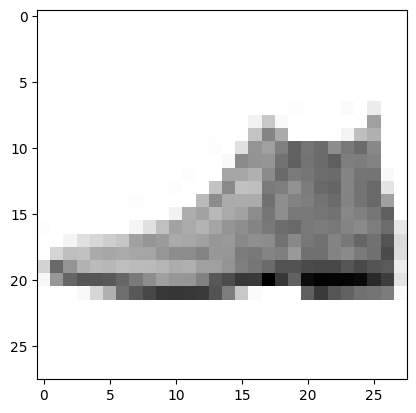

In [109]:
plt.imshow(x_test[0].reshape(28,28), cmap='Greys')

神經網路預測是： 1


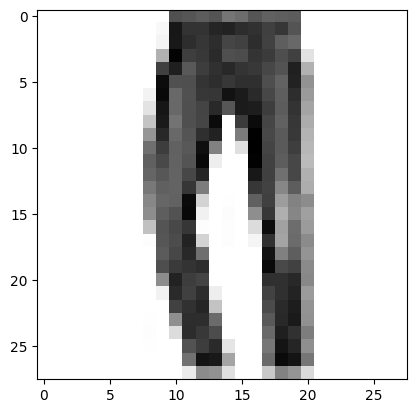

In [110]:
n = 5
print('神經網路預測是：', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

# 12.6更酷炫的互動呈現

In [111]:
from ipywidgets import interact_manual

In [112]:
def test(測試編號):
  plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys') #要將拉平的維度弄回 (28, 28)
  print('神經網路判斷為:', y_predict[測試編號])

In [113]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

到底測試資料總的狀況如何呢? 我們可以給我們神經網路「總評量」。

In [114]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8483 - loss: 0.0224


In [115]:
print('loss', score[0])
print('正確率', score[1])

loss 0.02283455990254879
正確率 0.8449000120162964


# 12.7儲存我們完整模型

如果對訓練成果滿意, 我們當然不想每次都再訓練一次! 我們可以把神經網路的架構和訓練好的參數都存起來, 以供日後使用!

在 Colab 上, 我們要先連到自己的 Google Drive。

In [116]:
#儲存 model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


再來是 cd 到你的資料夾中, 我們通常是放到自己 Colab Notebooks 中, 自然你可以指定其他的資料夾。

In [117]:
%cd '/content/drive/My Drive/Colab Notebooks/深度學習/少年Pi'

/content/drive/My Drive/Colab Notebooks/深度學習/少年Pi


In [118]:
model.save('my_dnn_model.keras')